In [1]:
import ast 
import pandas as pd
from datasets import load_dataset 
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

C:\Users\mamth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] =='United States')].copy()
df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

In [6]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US[['salary_year_avg','job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [7]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_DA_top_pay = df_DA_US_group.sort_values(by ='median', ascending=False).head(10)
df_DA_skills = df_DA_US_group.sort_values(by ='count', ascending = False).head(10).sort_values(by ='median', ascending=False).head(10)
df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


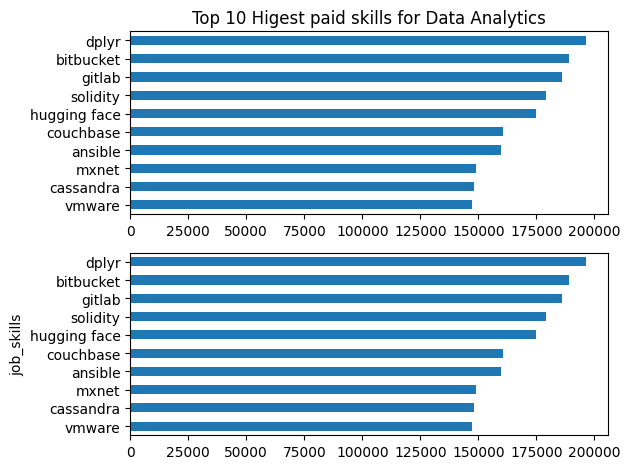

In [20]:
fig, ax =plt.subplots(2,1)

df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Higest paid skills for Data Analytics')
ax[0].set_ylabel('')
ax[0].set_ylabel('')

df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most In-Demand skills for Data Analytics')
ax[1].set_ylabel('')
ax[1].set_ylabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
fig.tight_layout()